In [2]:
#Imports for scope
from pverify.drivers.Scope.TekScope import IIviScope
from pverify.drivers.SimplifiedLabInstruments import SimpleScope

Note: The scope in this example is just used to display the signals that are generated by the function generator.

In [3]:
# Initialize and configure the scope. 
scope = SimpleScope(IIviScope())
scope.Initialize(ResourceName="USB0::0x0699::0x0451::C020200::INSTR", IdQuery=False, Reset=False, OptionString="simulate=False")
scope.ScopeSetup(TimePerRecord=0.00005, RecordLength=2000)
scope_ch_1 = scope.GetChannel(1)
scope_ch_1.Enable(True)

In [4]:
# Imports for function generator.
from pverify.drivers.Fgen import hp33120a, tkafg3k
from pverify.drivers.SimplifiedLabInstruments import SimpleFgen

In [5]:
# Creating the object.
fgen = SimpleFgen(hp33120a.IIviFgen())

In [6]:
# Opens the I/O session to the instrument.
fgen.Initialize(ResourceName="GPIB0::10::INSTR", IdQuery=False, Reset=False, OptionString="simulate=False")

In [7]:
# User can set InternalTriggerRate, ReferenceClockSource.
fgen.FgenSetup()

In [8]:
# Returns a channel object for the probe and switching it on.
fgen_chan = fgen.GetChannel(1)
fgen_chan.Enable()

In [9]:
#Configuring a Sine Wave
fgen_chan.Configure_Sine(1.00,500,0,0)

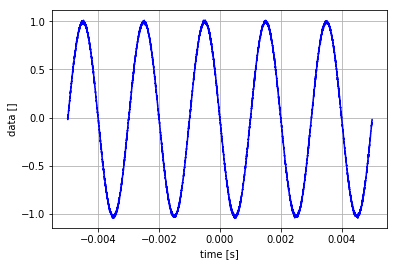

In [10]:
# Setting up the scope probe for fetching the waveform and plotting it
scope.ScopeSetup(TimePerRecord=0.01, RecordLength=20000)
scope_ch_1.ProbeSetup(Coupling="DC", Vrange=2.5 ,Bandwidth=200000, Probe_Attn=10.0, Impedance=50)
scope.Trigger_Edge(Level=0, Slope="fall", Position=0, Coupling="DC", ChannelIndex=1)
scope.Arm()
cur_wf = ch_1.GetProbeWaveform(Timeout=1)
cur_wf.plot()

In [11]:
# Configuring a Square Wave
fgen_chan.Configure_Square(50,1,1000,0)

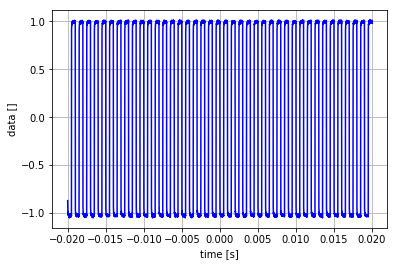

In [12]:
# Setting up the scope probe for fetching the waveform and plotting it
scope.ScopeSetup(TimePerRecord=0.05, RecordLength=20000)
scope_ch_1.ProbeSetup(Coupling="DC", Vrange=2.5 ,Bandwidth=200000, Probe_Attn= 10.0, Impedance=50)
scope.Trigger_Edge(Level=0, Slope="fall", Position=0, Coupling="DC", ChannelIndex=1)
scope.Arm()
cur_wf = scope_ch_1.GetProbeWaveform(Timeout=1)
cur_wf.plot()

In [13]:
#Configuring a DC Wave
fgen_chan.Configure_DC(1)

SimpleIviScope: Force trigger is not implemented for this instrument!


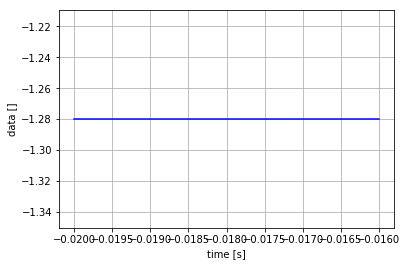

In [14]:
# Setting up the scope probe for fetching the waveform and plotting it
scope.ScopeSetup(TimePerRecord=0.05, RecordLength=1000)
scope_ch_1.ProbeSetup(Coupling="DC", Vrange=2.5 ,Bandwidth=200000, Probe_Attn= 10.0, Impedance=50)
scope.Arm()
cur_wf = scope_ch_1.GetProbeWaveform(Timeout=1, ForceTriggerOnTimeout=True)  # Force, since triggering on DC signal doesn't work
cur_wf.plot()

In [15]:
#Confighuring a Triangular Wave.
fgen_chan.Configure_Triangle(Amplitude=1, Frequency=20000, DCOffset=0)

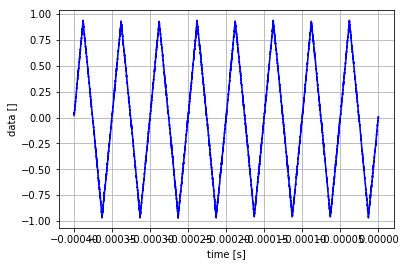

In [16]:
# Setting up the scope probe for fetching the waveform and plotting it
scope.ScopeSetup(TimePerRecord= 0.0005, RecordLength=20000)
scope_ch_1.ProbeSetup(Coupling="DC", Vrange=2.5 ,Bandwidth=10000, Impedance=50)
scope.Trigger_Edge(Level=0, Slope="rise", Position=50, Coupling="DC", ChannelIndex=1)
scope.Arm()
cur_wf = scope_ch_1.GetProbeWaveform(Timeout=1)
cur_wf.plot()

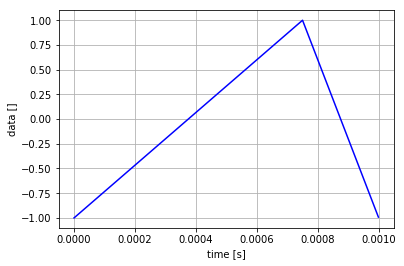

In [17]:
# Configuring a Sawtooth wave
from pverify import Waveform
w = Waveform.Generation.Sawtooth(1000, 0.75, 1, 1000, 0, 0)
w.plot()

In [24]:
# Configuring the arbitarory waveform with the sawtooth waveform.
fgen_chan.Configure_ArbitraryFromWaveform(w)

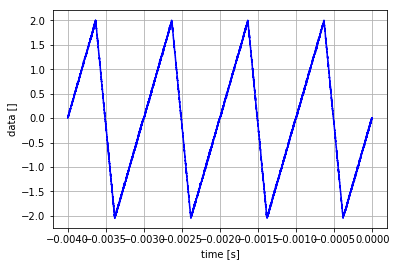

In [25]:
# Setting up the scope probe for fetching the waveform and plotting it
scope.ScopeSetup(TimePerRecord= 0.005, RecordLength=20000)
scope_ch_1.ProbeSetup(Coupling="DC", Vrange=5 ,Bandwidth=10000)
scope.Trigger_Edge(Level=0, Slope="rise", Position=50, Coupling="DC", ChannelIndex=1)
scope.Arm()
cur_wf = scope_ch_1.GetProbeWaveform(Timeout=1)
cur_wf.plot()

In [ ]:
# Closes the I/O session to the instrument.
scope.Close()
fgen.Close()